In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)

# Queueing simulation
## Exponential random draws

In [2]:
def exponential_rng(lam=1.0):  
    """ Generates exponential random number.
    
    Keywords:
        lam (float): the rate parameter, the inverse expectation of the distribution.
    
    Returns:
        exponential random number with rate lam.
    """
    return -np.log(np.random.rand()) / lam

## Define events

In [3]:
class Event:
    """ Generic event.
    
    Attributes:
        time (float): Event time.
    """
    
    def __init__(self, time):
        self.time = time
        
class Generation(Event):
    """ Generation event.
    
    Attributes:
        time (float): Event time.
    """
    def __init__(self, time):
        super().__init__(time)
        
class Arrival(Event):
    """ Arrival event.
    
    Attributes:
        time (float): Event time.
    """
    def __init__(self, time):
        super().__init__(time)
        
class Departure(Event):
    """ Departure event.
    
    Attributes:
        time (float): Event time.
    """
    def __init__(self, time):
        super().__init__(time)
        
class Termination(Event):
    """ Termination event.
    
    Attributes:
        time (float): Event time.
    """
    def __init__(self, time):
        super().__init__(time)

## Define scenario

In [4]:
class Scenario:
    """ Road scenario
    
    Attributes:
        demand duration (float): Duration of vehicle generation.
        t0 (float): Free-flow travel time.
        lam (float): Entry rate.
        mu (float): Service rate.
    """
    
    def __init__(self, 
                 demand_duration = 50.0,
                 t0  = 1.0,
                 lam = 1.0,
                 mu  = 1.0,
                ):
        self.demand_duration = demand_duration
        self.t0 = t0
        self.lam = lam
        self.mu = mu

## Define simulation procedure

In [5]:
def simulate(scenario):
    """ Implements the simulation procedure.
    
    Keywords:
        scenario (Scenario): Road scenario.
    
    Returns:
        times (list): Event times. 
        queues (list): Queue length over time. 
    """
    
    # Initialise the simulation
    queue = 0 # Current queue length: auxiliary variable
    times  = [0]
    queues = [0]
    
    # Trigger the first events
    # print('Start of generation')
    generation = Generation(exponential_rng(scenario.lam))
    termination = Termination(scenario.demand_duration)
    events = [generation, termination]
    
    # Main loop
    while len(events):
        e = events[0] # Extract the first event from the queue (event list)
        
        # Switch statement: execute one code block among many alternatives according to the event type 
        if isinstance(e, Generation):
            # print('Generation')
            
            # Schedule arrival of the vehicle
            arrival = Arrival(e.time + scenario.t0 * np.random.rand())
            events.append(arrival)
            
            # Schedule the next generation
            next_generation_time = e.time + exponential_rng(scenario.lam)
            if next_generation_time < scenario.demand_duration: # Add to the queue only if event time is smaller than the duration period
                generation = Generation(next_generation_time)
                events.append(generation)
                
        elif isinstance(e, Arrival):
            # print('Arrival')
            
            # Update state variables
            times.append(e.time)
            queue += 1 # Increment the current queue length by 1...
            queues.append(queue) # ...and store the new value
            
            # Schedule the departure of the vehicle just arrived, if the queue was empty
            if queue == 1:
                departure = Departure(e.time + exponential_rng(scenario.mu))
                events.append(departure)
                
        elif isinstance(e, Departure):
            # print('Departure')
            
            # Update state variables
            times.append(e.time)
            queue -= 1 # Decrement the current queue length by 1...
            queues.append(queue) # ...and store the new value
            
            # Schedule the next departure, if there are other vehicles waiting
            if queue:
                departure = Departure(e.time + exponential_rng(scenario.mu))
                events.append(departure)
                
        elif isinstance(e, Termination):
            # print('End of generation')
            pass
        
        else:
            raise('Unknown event type!')
            
        events.pop(0) # Remove the first event from the list
        events.sort(key = lambda event: event.time)
        
    return times, queues

## Run simulation

In [6]:
times, queues = simulate(Scenario())

## Repeat the simulation multiple times

In [7]:
D = 20
times_queues = [simulate(Scenario()) for d in range(D)]

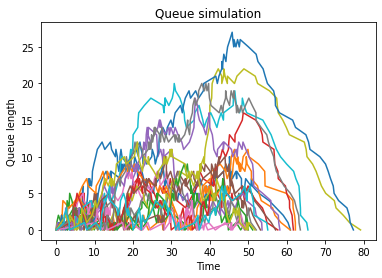

In [8]:
fig = plt.figure()
ax  = plt.subplot(1, 1, 1)

for t, q in times_queues:
    ax.plot(t, q)
    
ax.set(title  ='Queue simulation',
       xlabel = 'Time',
       ylabel = 'Queue length')

# fig.savefig('figure_queue_simulation.pdf', dpi = 300)
plt.show()